Problem 1:
Gradient dJ:
Matrix([[6*x1**2 + 6*x1*x2], [3*x1**2 + 6*x2 - 24]])
Hessian H:
Matrix([[12*x1 + 6*x2, 6*x1], [6*x1, 6]])

Hessian at (0,4):
Matrix([[24, 0], [0, 6]])
Determinant: 144
Trace: 30
Eigenvalues: {24: 1, 6: 1}


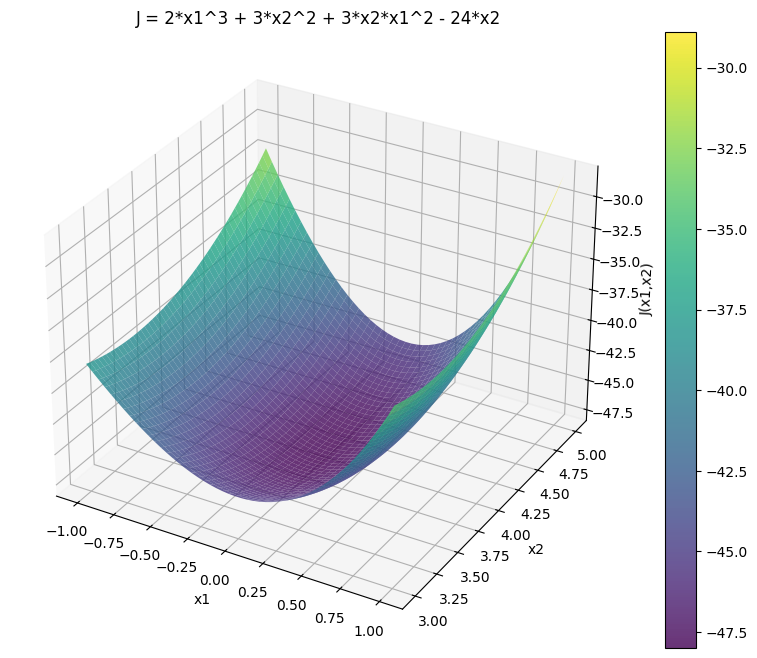


Problem 2:
Gradient dJ:
Matrix([[4*x1*(x1**2 + x2**2 - 1)], [4*x2*(x1**2 + 2*x2**2 - 2)]])
Hessian H:
Matrix([[12*x1**2 + 4*x2**2 - 4, 8*x1*x2], [8*x1*x2, 4*x1**2 + 24*x2**2 - 8]])

Hessian at (0,0):
Matrix([[-4, 0], [0, -8]])
Determinant: 32
Trace: -12
Eigenvalues: {-4: 1, -8: 1}


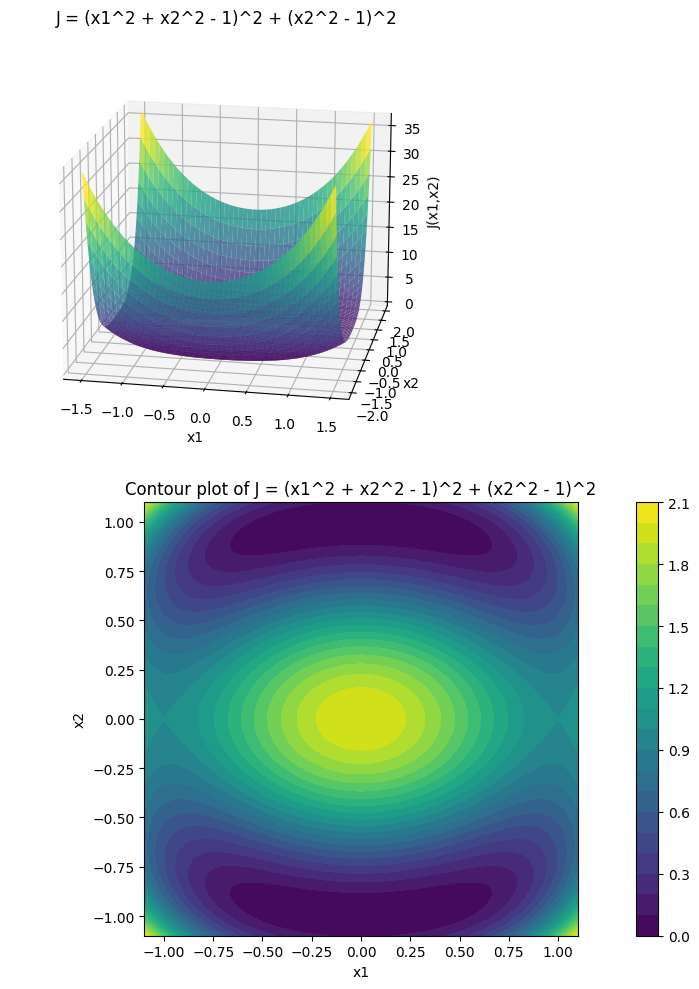


Problem 3:
Gradient dJ:
Matrix([[16*x1**3 - 4*x1 + x2**2], [2*x1*x2]])
Hessian H:
Matrix([[48*x1**2 - 4, 2*x2], [2*x2, 2*x1]])

Problem 4:
Gradient dJ:
Matrix([[-2*x1*(x1 + x2)/(x1**2 + x2**2 + 1)**2 + 1/(x1**2 + x2**2 + 1)], [-2*x2*(x1 + x2)/(x1**2 + x2**2 + 1)**2 + 1/(x1**2 + x2**2 + 1)]])
Hessian H:
Matrix([[2*(4*x1**2*(x1 + x2) - (3*x1 + x2)*(x1**2 + x2**2 + 1))/(x1**2 + x2**2 + 1)**3, 2*(x1 + x2)*(-x1**2 + 4*x1*x2 - x2**2 - 1)/(x1**2 + x2**2 + 1)**3], [2*(x1 + x2)*(-x1**2 + 4*x1*x2 - x2**2 - 1)/(x1**2 + x2**2 + 1)**3, 2*(4*x2**2*(x1 + x2) - (x1 + 3*x2)*(x1**2 + x2**2 + 1))/(x1**2 + x2**2 + 1)**3]])


In [1]:
# Worksheet 3 Gradient and Hessian and Saddle Points
# Python equivalent of MATLAB code

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, diff, simplify, Matrix, trace, det
from numpy import linspace, meshgrid

# Clear all
plt.close('all')

# Problem 1
print("Problem 1:")
x1, x2 = symbols('x1 x2')
J = 2*x1**3 + 3*x2**2 + 3*x2*x1**2 - 24*x2
dJdx1 = diff(J, x1)
dJdx2 = diff(J, x2)
dJ = Matrix([dJdx1, dJdx2])
print("Gradient dJ:")
print(dJ)

Hdx1 = diff(dJ, x1)
Hdx2 = diff(dJ, x2)
H = Matrix.hstack(Hdx1, Hdx2)
print("Hessian H:")
print(H)

# Substitute with Saddle Point (0,4)
A = H.subs({x1: 0, x2: 4})
print("\nHessian at (0,4):")
print(A)
print("Determinant:", det(A))
print("Trace:", trace(A))
Lambda = sp.Matrix(A).eigenvals()
print("Eigenvalues:", Lambda)

# Create a 3D plot equivalent to MATLAB's ezmesh
def plot_function1():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    x = linspace(-1, 1, 50)
    y = linspace(3, 5, 50)
    X, Y = meshgrid(x, y)
    Z = 2*X**3 + 3*Y**2 + 3*Y*X**2 - 24*Y

    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('J(x1,x2)')
    ax.set_title('J = 2*x1^3 + 3*x2^2 + 3*x2*x1^2 - 24*x2')
    fig.colorbar(surf)
    plt.show()

plot_function1()

# Problem 2
print("\nProblem 2:")
J = (x1**2 + x2**2 - 1)**2 + (x2**2 - 1)**2
dJdx1 = diff(J, x1)
dJdx2 = diff(J, x2)
dJ = simplify(Matrix([dJdx1, dJdx2]))
print("Gradient dJ:")
print(dJ)

Hdx1 = diff(dJ, x1)
Hdx2 = diff(dJ, x2)
H = Matrix.hstack(Hdx1, Hdx2)
print("Hessian H:")
print(H)

# Substitute with Saddle Point (0,0)
A = H.subs({x1: 0, x2: 0})
print("\nHessian at (0,0):")
print(A)
print("Determinant:", det(A))
print("Trace:", trace(A))
Lambda = sp.Matrix(A).eigenvals()
print("Eigenvalues:", Lambda)

# Create a 3D plot and contour plot equivalent to MATLAB's ezmesh and ezcontourf
def plot_function2():
    fig = plt.figure(figsize=(12, 10))

    # 3D surface plot
    ax1 = fig.add_subplot(211, projection='3d')
    x = linspace(-1.5, 1.5, 50)
    y = linspace(-2, 2, 50)
    X, Y = meshgrid(x, y)
    Z = (X**2 + Y**2 - 1)**2 + (Y**2 - 1)**2

    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax1.view_init(17.4, -78.9)  # Set view angle similar to MATLAB view([-78.9 17.4])
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('J(x1,x2)')
    ax1.set_title('J = (x1^2 + x2^2 - 1)^2 + (x2^2 - 1)^2')

    # Contour plot
    ax2 = fig.add_subplot(212)
    x = linspace(-1.1, 1.1, 100)
    y = linspace(-1.1, 1.1, 100)
    X, Y = meshgrid(x, y)
    Z = (X**2 + Y**2 - 1)**2 + (Y**2 - 1)**2

    contour = ax2.contourf(X, Y, Z, 20, cmap='viridis')
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_title('Contour plot of J = (x1^2 + x2^2 - 1)^2 + (x2^2 - 1)^2')
    ax2.set_aspect('equal')
    fig.colorbar(contour, ax=ax2)

    plt.tight_layout()
    plt.show()

plot_function2()

# Problem 3
print("\nProblem 3:")
J = -2*x1**2 + x1*x2**2 + 4*x1**4
dJdx1 = diff(J, x1)
dJdx2 = diff(J, x2)
dJ = Matrix([dJdx1, dJdx2])
print("Gradient dJ:")
print(dJ)

Hdx1 = diff(dJ, x1)
Hdx2 = diff(dJ, x2)
H = Matrix.hstack(Hdx1, Hdx2)
print("Hessian H:")
print(H)

# Problem 4
print("\nProblem 4:")
J = (x1 + x2)/(x1**2 + x2**2 + 1)
dJdx1 = diff(J, x1)
dJdx2 = diff(J, x2)
dJ = Matrix([dJdx1, dJdx2])
print("Gradient dJ:")
print(dJ)

Hdx1 = diff(dJ, x1)
Hdx2 = diff(dJ, x2)
H = simplify(Matrix.hstack(Hdx1, Hdx2))
print("Hessian H:")
print(H)